In [1]:
!pip install tensorflow keras mlflow --quiet

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


### Tutorial: Pfam Protein Sequence Classification with Keras and MlFlow

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import os

In [2]:
df = pd.read_csv("../../../datasets/dataset_pfam_seq_sd.csv")

In [3]:
df.shape

(1339083, 5)

In [4]:
df.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...


In [5]:
df.isna().sum()

family_id           0
sequence_name       0
family_accession    0
aligned_sequence    0
sequence            0
dtype: int64

In [6]:
df["family_id"].groupby(df["family_id"]).value_counts().nlargest(10)

family_id        family_id      
Methyltransf_25  Methyltransf_25    4545
LRR_1            LRR_1              2407
Acetyltransf_7   Acetyltransf_7     2199
His_kinase       His_kinase         1921
Bac_transf       Bac_transf         1908
Lum_binding      Lum_binding        1878
DNA_binding_1    DNA_binding_1      1681
Chromate_transp  Chromate_transp    1579
Lipase_GDSL_2    Lipase_GDSL_2      1564
DnaJ_CXXCXGXG    DnaJ_CXXCXGXG      1512
Name: family_id, dtype: int64

In [7]:
df["family_accession"].groupby(df["family_accession"]).value_counts().nlargest(10)

family_accession  family_accession
PF13649.6         PF13649.6           4545
PF00560.33        PF00560.33          2407
PF13508.7         PF13508.7           2199
PF06580.13        PF06580.13          1921
PF02397.16        PF02397.16          1908
PF00677.17        PF00677.17          1878
PF01035.20        PF01035.20          1681
PF02417.15        PF02417.15          1579
PF13472.6         PF13472.6           1564
PF00684.19        PF00684.19          1512
Name: family_accession, dtype: int64

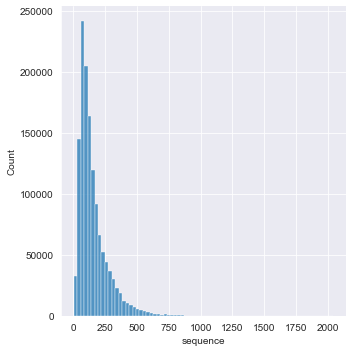

In [8]:
sns.displot(df["sequence"].apply(lambda x: len(x)), bins=75)

In [9]:
df["sequence"].str.len().mean()

155.15658103343856

In [10]:
df["sequence"].str.len().min()

4

In [11]:
df["sequence"].str.len().max()

2037

In [12]:
df["sequence"].str.len().median()

119.0

In [13]:
df_filt = df.groupby("family_accession").filter(lambda x: len(x) > 1200)

In [14]:
df_filt

,family_id,sequence_name,family_accession,aligned_sequence,sequence
8,His_kinase,Q47E94_DECAR/372-450,PF06580.13,SE.I..KLLHAQVNPHFLFNALNTL......S....AV...I.......,SEIKLLHAQVNPHFLFNALNTLSAVIRRDPEKACHLVLNLSTFFRK...
29,Bac_transf,D3EZT3_CONWI/319-507,PF02397.16,KRTFDLIG.SL.....LLLT.L.L.S...P.L.L...L....T......,KRTFDLIGSLLLLTLLSPLLLTLSLAVKLSSRGPVFYRSTRPGIGG...
57,WD40,O48679_ARATH/318-354,PF00400.32,MSVVGA..L....R.....GH....RKA.............I...M...,MSVVGALRGHRKAIMCLAVASDLVLSGSADKSLRVWR
103,Glycos_trans_3N,A0A068Y394_ECHMU/7-69,PF02885.17,SGILSKKANG....G..SLSSTEIDYYTKEL..AE.DN...........,SGILSKKANGGSLSSTEIDYYTKELAEDNVNIAQIGAFLMAVFTRG...
120,Chromate_transp,D5EXG9_PRER2/4-187,PF02417.15,VSLFITFFEIGLFGFGGGYGML.SLIQHET........VE.........,VSLFITFFEIGLFGFGGGYGMLSLIQHETVEAHHWLSTSEFTDIVA...
...,...,...,...,...,...
1338917,DHH,R7FC58_9FIRM/344-498,PF01368.20,QVFL.MGHRFGDLDSIGS.ACGLAG........................,QVFLMGHRFGDLDSIGSACGLAGAVRLMRKPAYVVVSRQSCLATQL...
1338932,HTH_1,Q98N95_RHILO/3-62,PF00126.27,LEALADFNLVAAHG.GFGRAGR.ISGR...SKATLSRHVNELEH.S...,LEALADFNLVAAHGGFGRAGRISGRSKATLSRHVNELEHSLGVRLI...
1338989,MutS_III,I0IH70_PHYMF/275-582,PF05192.18,ASLASLEV.VR................TQAAAGA...............,ASLASLEVVRTQAAAGASGETAGSLLGVLSGNGKATRTPMGGRLLR...
1339027,Chromate_transp,R5XL48_9FIRM/4-177,PF02417.15,LKLFLSFLQIGLFSFGGGYAAM.PFIRDQV........VV.........,LKLFLSFLQIGLFSFGGGYAAMPFIRDQVVVQNSWLSMQEFTDLIT...


In [15]:
df_bal = df_filt.groupby('family_accession').apply(lambda x: x.sample(1200))
df_bal.family_accession.value_counts()

PF02729.21    1200
PF03453.17    1200
PF00560.33    1200
PF00684.19    1200
PF03484.15    1200
PF06580.13    1200
PF00126.27    1200
PF01368.20    1200
PF01715.17    1200
PF01523.16    1200
PF02881.19    1200
PF00400.32    1200
PF13649.6     1200
PF01725.16    1200
PF01799.20    1200
PF13472.6     1200
PF00391.23    1200
PF02545.14    1200
PF02397.16    1200
PF13508.7     1200
PF05192.18    1200
PF01035.20    1200
PF02417.15    1200
PF00677.17    1200
PF00586.24    1200
PF00763.23    1200
PF01255.19    1200
PF02885.17    1200
Name: family_accession, dtype: int64

In [16]:
df_bal.head()

family_id       sequence_name family_accession  \
family_accession                                                          
PF00126.27       1164493     HTH_1   Q8XQJ0_RALSO/7-66       PF00126.27   
                 1064301     HTH_1   Q8PCA2_XANCP/3-62       PF00126.27   
                 165761      HTH_1  Q7VWW6_BORPE/24-88       PF00126.27   
                 715198      HTH_1   Q7D3E4_AGRFC/5-64       PF00126.27   
                 70910       HTH_1     CMPR_SYNY3/6-65       PF00126.27   

                                                           aligned_sequence  \
family_accession                                                              
PF00126.27       1164493  IRHLWLFHAVAEER.NFSRAAK.RLGM...SQPPLTDQIKVLEH.A...   
                 1064301  LRDLKYLVALADHK.HFGRAAT.ACFV...SQPTLSTQIKKLED.E...   
                 165761   QHRIDLLAQIEATG.SISAAAR.AAGM...SYKGAWDAIDAMNN.L...   
                 715198   LSVLRNFAVVARAG.SISVASQ.QVGR...TQSTLSMQMQRLEE.M...   
                 70910    LHQFEVFAAIARTG.SFTKAAE.ELFL...TQPTVSQQMKQLTK.A...   

                                                                   sequence  
family_accession                                                             
PF00126.27       1164493  IRHLWLFHAVAEERNFSRAAKRLGMSQPPLTDQIKVLEHALKIKLF...  
                 1064301  LRDLKYLVALADHKHFGRAATACFVSQPTLSTQIKKLEDELGVPLV...  
                 165761   QHRIDLLAQIEATGSISAAARAAGMSYKGAWDAIDAMNNLAGEPLV...  
                 715198   LSVLRNFAVVARAGSISVASQQVGRTQSTLSMQMQRLEEMIGQILL...  
                 70910    LHQFEVFAAIARTGSFTKAAEELFLTQPTVSQQMKQLTKAIGVPLY...

In [17]:
df_red = df_bal[["family_accession", "sequence"]].reset_index(drop=True)
df_red

,family_accession,sequence
0,PF00126.27,IRHLWLFHAVAEERNFSRAAKRLGMSQPPLTDQIKVLEHALKIKLF...
1,PF00126.27,LRDLKYLVALADHKHFGRAATACFVSQPTLSTQIKKLEDELGVPLV...
2,PF00126.27,QHRIDLLAQIEATGSISAAARAAGMSYKGAWDAIDAMNNLAGEPLV...
3,PF00126.27,LSVLRNFAVVARAGSISVASQQVGRTQSTLSMQMQRLEEMIGQILL...
4,PF00126.27,LHQFEVFAAIARTGSFTKAAEELFLTQPTVSQQMKQLTKAIGVPLY...
...,...,...
33595,PF13649.6,VLDIGCGDGKFTANFVDRVEYVLGLDASKGMIEAAKRDFARGNAEY...
33596,PF13649.6,ALDLAGGTGDLALLMQKRMTRSGRVTICDINYSMLDQGRHRLTDEG...
33597,PF13649.6,VLDIGTGPGFFAILLALSGHQVTAIDATPGMLLEAKNNASQHNVSI...
33598,PF13649.6,VLDVGTGTGLVALAAARLVGSSGRVTGVDLSDAMIHKAAVKARAQG...


In [18]:
num_classes = len(df_red.family_accession.value_counts())
num_classes

28

In [19]:
df_red.family_accession.value_counts()

PF02729.21    1200
PF03453.17    1200
PF00560.33    1200
PF00684.19    1200
PF03484.15    1200
PF06580.13    1200
PF00126.27    1200
PF01368.20    1200
PF01715.17    1200
PF01523.16    1200
PF02881.19    1200
PF00400.32    1200
PF13649.6     1200
PF01725.16    1200
PF01799.20    1200
PF13472.6     1200
PF00391.23    1200
PF02545.14    1200
PF02397.16    1200
PF13508.7     1200
PF05192.18    1200
PF01035.20    1200
PF02417.15    1200
PF00677.17    1200
PF00586.24    1200
PF00763.23    1200
PF01255.19    1200
PF02885.17    1200
Name: family_accession, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_red, test_size=0.25)
X_val, X_test = train_test_split(X_test, test_size=0.50)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(25200, 2)
(4200, 2)
(4200, 2)


In [22]:
aa_seq_dict = { 'A': 1,
                'C': 2,
                'D': 3,
                'E': 4,
                'F': 5,
                'G': 6,
                'H': 7,
                'I': 8,
                'K': 9,
                'L': 10,
                'M': 11,
                'N': 12,
                'P': 13,
                'Q': 14,
                'R': 15,
                'S': 16,
                'T': 17,
                'V': 18,
                'W': 19,
                'Y': 20 }

In [23]:
def aa_seq_encoder(data):
    full_sequence_list = []
    for i in data['sequence'].values:
        row_sequence_list = []
        for j in i:
            row_sequence_list.append(aa_seq_dict.get(j, 0))
        full_sequence_list.append(np.array(row_sequence_list))
    return full_sequence_list
  
X_train_encode = aa_seq_encoder(X_train) 
X_val_encode = aa_seq_encoder(X_val) 
X_test_encode = aa_seq_encoder(X_test) 

In [24]:
X_train_encode[0]

array([ 4,  9, 15,  1, 20,  5, 18, 18,  4,  3, 13, 17,  6,  9, 18, 10,  6,
        6,  8,  6,  8,  3,  4,  5, 13,  6,  5,  1, 15,  2,  1,  4,  8, 14,
        9, 10, 20, 10, 16,  3,  4,  1,  9,  6,  9,  6, 10,  6,  9,  1, 10,
       11,  4,  1,  1,  4,  6, 20,  1, 18, 14,  1,  6, 20,  4, 15, 10, 20,
       10,  4, 17,  7, 17, 12, 10,  4,  1,  1,  8,  7, 10, 20,  4,  9, 16,
        6,  5,  7,  9])

In [25]:
from keras.preprocessing.sequence import pad_sequences

max_length = 100

X_train_padded = pad_sequences(X_train_encode, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_encode, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_encode, maxlen=max_length, padding='post', truncating='post')

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_enc = le.fit_transform(X_train['family_accession'])
y_val_enc = le.transform(X_val['family_accession'])
y_test_enc = le.transform(X_test['family_accession'])


In [27]:
print('Total classes: ', len(le.classes_))

Total classes:  28


In [28]:
y_train = to_categorical(y_train_enc)
y_val = to_categorical(y_val_enc)
y_test = to_categorical(y_test_enc)

### Model Development:

In [29]:
import mlflow
import mlflow.keras

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Bidirectional, LSTM, Dropout, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.regularizers import l2
from keras.models import Model
from keras.callbacks import EarlyStopping


### Bidirectional LSTM:

2021/08/22 21:58:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '09a160473ea945edbacd7365202355ba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/30
99/99 - 8s - loss: 2.2130 - accuracy: 0.3352 - val_loss: 1.2912 - val_accuracy: 0.6260
Epoch 2/30
99/99 - 6s - loss: 1.1113 - accuracy: 0.6483 - val_loss: 0.7402 - val_accuracy: 0.7955
Epoch 3/30
99/99 - 7s - loss: 0.7756 - accuracy: 0.7514 - val_loss: 0.5061 - val_accuracy: 0.8595
Epoch 4/30
99/99 - 7s - loss: 0.6071 - accuracy: 0.8086 - val_loss: 0.3960 - val_accuracy: 0.8874
Epoch 5/30
99/99 - 7s - loss: 0.5129 - accuracy: 0.8394 - val_loss: 0.3406 - val_accuracy: 0.9007
Epoch 6/30
99/99 - 7s - loss: 0.4457 - accuracy: 0.8606 - val_loss: 0.2723 - val_accuracy: 0.9238
Epoch 7/30
99/99 - 7s - loss: 0.4034 - accuracy: 0.8743 - val_loss: 0.2532 - val_accuracy: 0.9302
Epoch 8/30
99/99 - 7s - loss: 0.3615 - accuracy: 0.8866 - val_loss: 0.2461 - val_accuracy: 0.9267
Epoch 9/30
99/99 - 7s - loss: 0.3352 - accuracy: 0.8944 - val_loss: 0.2130 - val_accuracy: 0.9383
Epoch 10/30
99/99 - 7s - loss: 0.3178 - accuracy: 0.9039 - val_loss: 0.1873 - val_accuracy: 0.9495
Epoch 11/30
99/99 -

INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmpoch3r34d\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmpoch3r34d\model\data\model\assets


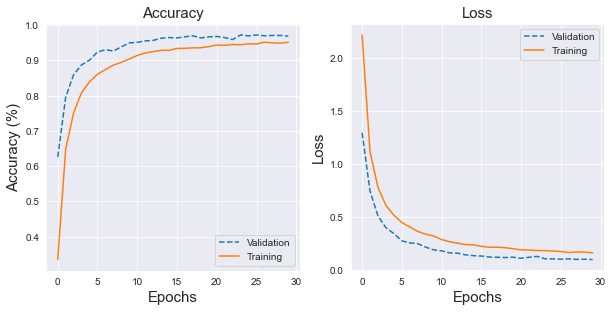

In [44]:
## Bidirectional LSTM n=8, lr=0.01
model = Sequential()
model.add(Embedding(21, 8, input_length=max_length, name="EmbeddingLayer"))
model.add(Bidirectional(LSTM(8), name="BidirectionalLayer"))
model.add(Dropout(0.2, name="DropoutLayer"))
model.add(Dense(28, activation='softmax', name="DenseLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

mlflow.keras.autolog()
history = model.fit(
    X_train_padded, y_train,
    epochs=30, batch_size=256,
    validation_data=(X_val_padded, y_val),
    callbacks=[es], verbose=2
    )

fig = plt.figure(figsize=(10,10))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.legend(["Validation", "Training"], loc="lower right")

plt.subplot(2, 2, 2)
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history.history["val_loss"], label='Validation loss', linestyle='dashed')
plt.plot(history.history["loss"], label='Training loss')
plt.legend(["Validation", "Training"], loc="upper right")

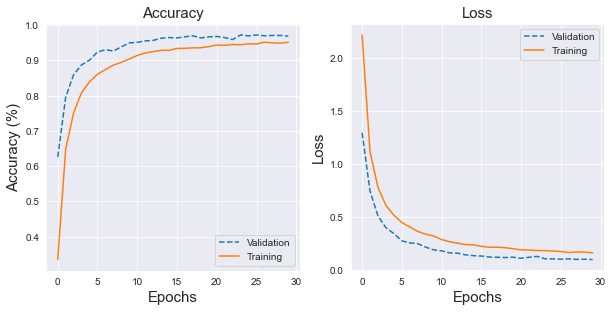

In [45]:
fig = plt.figure(figsize=(10,10))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.legend(["Validation", "Training"], loc="lower right")

plt.subplot(2, 2, 2)
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history.history["val_loss"], label='Validation loss', linestyle='dashed')
plt.plot(history.history["loss"], label='Training loss')
plt.legend(["Validation", "Training"], loc="upper right")

In [42]:
## Bidirectional LSTM n=12, lr=0.01
model = Sequential()
model.add(Embedding(21, 12, input_length=max_length, name="EmbeddingLayer"))
model.add(Bidirectional(LSTM(12), name="BidirectionalLayer"))
model.add(Dropout(0.2, name="DropoutLayer"))
model.add(Dense(28, activation='softmax', name="DenseLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

mlflow.keras.autolog()
history = model.fit(
    X_train_padded, y_train,
    epochs=30, batch_size=256,
    validation_data=(X_val_padded, y_val),
    callbacks=[es], verbose=2
    )

2021/08/22 21:53:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cf8c8e4b1dff4a4784414fa86f05059c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/30
99/99 - 10s - loss: 1.9501 - accuracy: 0.3991 - val_loss: 0.9718 - val_accuracy: 0.7043
Epoch 2/30
99/99 - 6s - loss: 0.8300 - accuracy: 0.7457 - val_loss: 0.4931 - val_accuracy: 0.8655
Epoch 3/30
99/99 - 6s - loss: 0.4994 - accuracy: 0.8548 - val_loss: 0.3005 - val_accuracy: 0.9131
Epoch 4/30
99/99 - 6s - loss: 0.3533 - accuracy: 0.8951 - val_loss: 0.1944 - val_accuracy: 0.9471
Epoch 5/30
99/99 - 6s - loss: 0.2678 - accuracy: 0.9222 - val_loss: 0.1508 - val_accuracy: 0.9593
Epoch 6/30
99/99 - 6s - loss: 0.2198 - accuracy: 0.9358 - val_loss: 0.1236 - val_accuracy: 0.9664
Epoch 7/30
99/99 - 6s - loss: 0.1872 - accuracy: 0.9460 - val_loss: 0.1124 - val_accuracy: 0.9681
Epoch 8/30
99/99 - 6s - loss: 0.1598 - accuracy: 0.9526 - val_loss: 0.0988 - val_accuracy: 0.9738
Epoch 9/30
99/99 - 6s - loss: 0.1544 - accuracy: 0.9539 - val_loss: 0.0908 - val_accuracy: 0.9743
Epoch 10/30
99/99 - 6s - loss: 0.1359 - accuracy: 0.9600 - val_loss: 0.0915 - val_accuracy: 0.9762
Epoch 11/30
99/99 

INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmp882qbck1\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmp882qbck1\model\data\model\assets


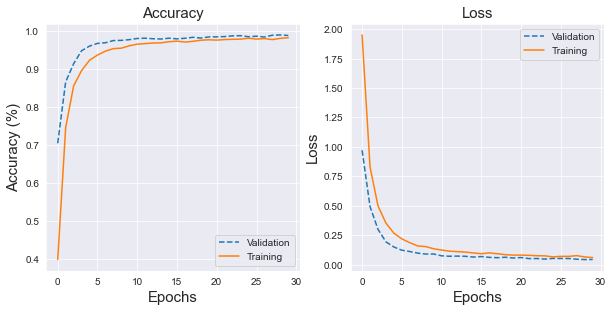

In [43]:
fig = plt.figure(figsize=(10,10))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.legend(["Validation", "Training"], loc="lower right")

plt.subplot(2, 2, 2)
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history.history["val_loss"], label='Validation loss', linestyle='dashed')
plt.plot(history.history["loss"], label='Training loss')
plt.legend(["Validation", "Training"], loc="upper right")

In [41]:
## Bidirectional LSTM n=12, lr=0.1
model = Sequential()
model.add(Embedding(21, 12, input_length=max_length, name="EmbeddingLayer"))
model.add(Bidirectional(LSTM(12), name="BidirectionalLayer"))
model.add(Dropout(0.2, name="DropoutLayer"))
model.add(Dense(28, activation='softmax', name="DenseLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

mlflow.keras.autolog()
history = model.fit(
    X_train_padded, y_train,
    epochs=30, batch_size=256,
    validation_data=(X_val_padded, y_val),
    callbacks=[es], verbose=2
    )

2021/08/22 21:52:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fb5142e0f776495d971d02f2b2886775', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/30
99/99 - 9s - loss: 1.1314 - accuracy: 0.6419 - val_loss: 0.5133 - val_accuracy: 0.8336
Epoch 2/30
99/99 - 6s - loss: 0.6811 - accuracy: 0.7823 - val_loss: 0.4025 - val_accuracy: 0.8693
Epoch 3/30
99/99 - 6s - loss: 0.6186 - accuracy: 0.8029 - val_loss: 0.4093 - val_accuracy: 0.8738
Epoch 4/30
99/99 - 6s - loss: 0.6204 - accuracy: 0.8060 - val_loss: 0.4456 - val_accuracy: 0.8648
Epoch 5/30
99/99 - 6s - loss: 0.5549 - accuracy: 0.8225 - val_loss: 0.3356 - val_accuracy: 0.8936
Epoch 6/30
99/99 - 6s - loss: 0.6180 - accuracy: 0.8019 - val_loss: 0.4124 - val_accuracy: 0.8681
Epoch 7/30
99/99 - 6s - loss: 0.7409 - accuracy: 0.7618 - val_loss: 0.5530 - val_accuracy: 0.8150
Epoch 8/30
99/99 - 6s - loss: 0.7041 - accuracy: 0.7756 - val_loss: 0.4278 - val_accuracy: 0.8645
Epoch 9/30
99/99 - 6s - loss: 0.6330 - accuracy: 0.7980 - val_loss: 0.4082 - val_accuracy: 0.8750
Epoch 10/30
99/99 - 6s - loss: 0.6213 - accuracy: 0.8030 - val_loss: 0.4841 - val_accuracy: 0.8479
Epoch 00010: early 

INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmp8yub6ir5\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmp8yub6ir5\model\data\model\assets


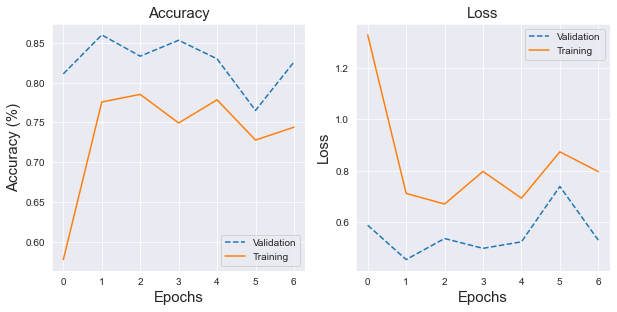

In [40]:
fig = plt.figure(figsize=(10,10))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.legend(["Validation", "Training"], loc="lower right")

plt.subplot(2, 2, 2)
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history.history["val_loss"], label='Validation loss', linestyle='dashed')
plt.plot(history.history["loss"], label='Training loss')
plt.legend(["Validation", "Training"], loc="upper right")

### LSTM Models:

In [34]:
model = Sequential()
model.add(Embedding(21, 8, input_length=max_length, name="EmbeddingLayer"))
model.add(LSTM(8, name="LSTMLayer"))
model.add(Dropout(0.2, name="DropoutLayer"))
model.add(Dense(28, activation='softmax', name="DenseLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

mlflow.keras.autolog()
history = model.fit(
    X_train_padded, y_train,
    epochs=30, batch_size=256,
    validation_data=(X_val_padded, y_val),
    callbacks=[es], verbose=2
    )


2021/08/22 21:27:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e080a648a3dc491e93f9769cc20296ec', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/30
99/99 [==============================] - 4s 27ms/step - loss: 2.9675 - accuracy: 0.0773 - val_loss: 2.4261 - val_accuracy: 0.1631
Epoch 2/30
99/99 [==============================] - 2s 23ms/step - loss: 2.3729 - accuracy: 0.1702 - val_loss: 2.1269 - val_accuracy: 0.2724
Epoch 3/30
99/99 [==============================] - 2s 23ms/step - loss: 2.1439 - accuracy: 0.2373 - val_loss: 1.9758 - val_accuracy: 0.3202
Epoch 4/30
99/99 [==============================] - 2s 23ms/step - loss: 2.0383 - accuracy: 0.2661 - val_loss: 1.8678 - val_accuracy: 0.3788
Epoch 5/30
99/99 [==============================] - 2s 22ms/step - loss: 1.9394 - accuracy: 0.3161 - val_loss: 1.7441 - val_accuracy: 0.3938
Epoch 6/30
99/99 [==============================] - 2s 23ms/step - loss: 1.8436 - accuracy: 0.3466 - val_loss: 1.6486 - val_accuracy: 0.4188
Epoch 7/30
99/99 [==============================] - 2s 23ms/step - loss: 1.7541 - accuracy: 0.3790 - val_loss: 1.5130 - val_accuracy: 0.4976
Epoch 8/30
99

INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmpawrdebyo\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmpawrdebyo\model\data\model\assets


### Simple RNN Models:

In [35]:
model = Sequential()
model.add(Embedding(21, 8, input_length=max_length, name="EmbeddingLayer"))
model.add(SimpleRNN(8, name="SimpleRNNLayer"))
model.add(Dropout(0.2, name="DropoutLayer"))
model.add(Dense(28, activation='softmax', name="DenseLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

mlflow.keras.autolog()
history = model.fit(
    X_train_padded, y_train,
    epochs=30, batch_size=256,
    validation_data=(X_val_padded, y_val),
    callbacks=[es], verbose=2
    )


2021/08/22 21:29:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f88f2edf57554d53a8c9f92f4c9f8420', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/30
99/99 - 3s - loss: 2.6669 - accuracy: 0.1567 - val_loss: 2.2014 - val_accuracy: 0.2355
Epoch 2/30
99/99 - 1s - loss: 2.1707 - accuracy: 0.2450 - val_loss: 2.0069 - val_accuracy: 0.2919
Epoch 3/30
99/99 - 1s - loss: 2.0926 - accuracy: 0.2600 - val_loss: 1.9739 - val_accuracy: 0.2864
Epoch 4/30
99/99 - 1s - loss: 2.0522 - accuracy: 0.2663 - val_loss: 1.9227 - val_accuracy: 0.3271
Epoch 5/30
99/99 - 1s - loss: 2.0114 - accuracy: 0.2792 - val_loss: 1.8571 - val_accuracy: 0.3669
Epoch 6/30
99/99 - 1s - loss: 1.9862 - accuracy: 0.2854 - val_loss: 1.8286 - val_accuracy: 0.3845
Epoch 7/30
99/99 - 1s - loss: 3.0981 - accuracy: 0.1371 - val_loss: 2.6383 - val_accuracy: 0.1229
Epoch 8/30
99/99 - 1s - loss: 2.5962 - accuracy: 0.1267 - val_loss: 2.3848 - val_accuracy: 0.1698
Epoch 9/30
99/99 - 1s - loss: 2.4147 - accuracy: 0.1584 - val_loss: 2.2574 - val_accuracy: 0.2055
Epoch 10/30
99/99 - 1s - loss: 2.2565 - accuracy: 0.2118 - val_loss: 2.1137 - val_accuracy: 0.3002
Epoch 11/30
99/99 -

INFO:tensorflow:Assets written to: C:\Users\SALEHA~1\AppData\Local\Temp\tmpqsgzwgzh\model\data\model\assets


In [ ]:
!mlflow ui